# Week 3 Notebook- Plotting with Matplotlib 

In [1]:
# below we load the two libraries we will be using
import numpy as np
import matplotlib.pyplot as plt

First we will load the data from the file Apple_Stock.csv into a variable

Each block corresponds to one of the lists in the associated work sheet (in the same order).

 ## Simple plotting


In [2]:
# Use the numpy function loadtxt to load the file into a variable called StockPrice
StockPrice = np.loadtxt('data/cos.txt')
print(StockPrice)

[[0.0000000e+00 9.9995000e-01]
 [1.0000000e+00 9.9048977e-01]
 [2.0000000e+00 9.6481739e-01]
 ...
 [4.9970000e+03 9.6739831e-01]
 [4.9980000e+03 9.9181609e-01]
 [4.9990000e+03 1.0000000e+00]]


In [3]:
# Now divide StockProce into two variables X and Y
X, Y = StockPrice[:,0], StockPrice[:,1]

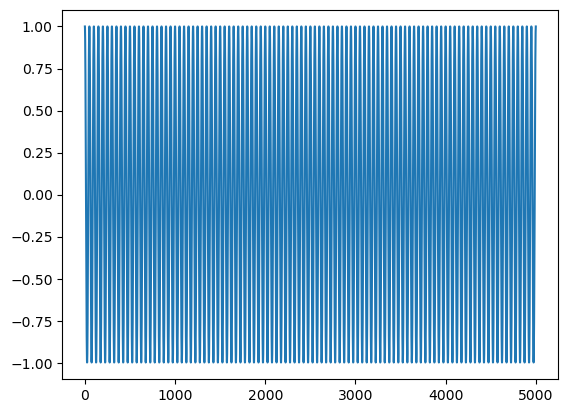

In [4]:
# create the first plot of X versus Y
plt.plot(X, Y)

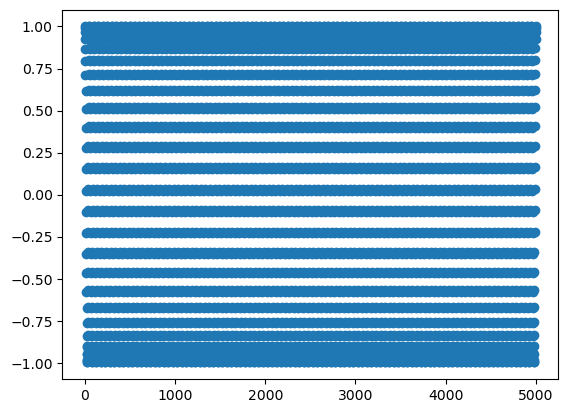

In [5]:
# create a scatter plot of X versus Y
plt.scatter(X, Y)

Clearly something is not right with the line plot, we need to sort the first column. 

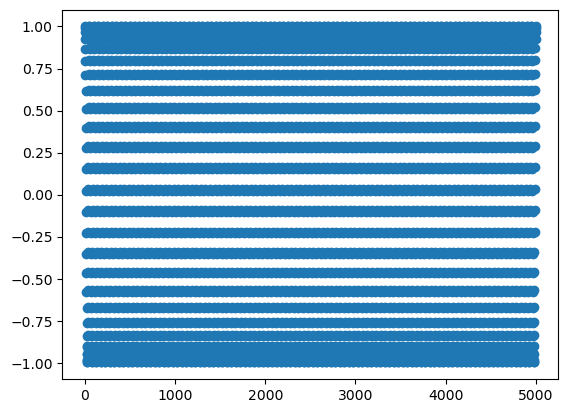

In [24]:
# use the np.sort function to sort X into vartiable X_sorted
# and plot again
X_sorted = np.sort(X)
plt.scatter(X_sorted, Y)

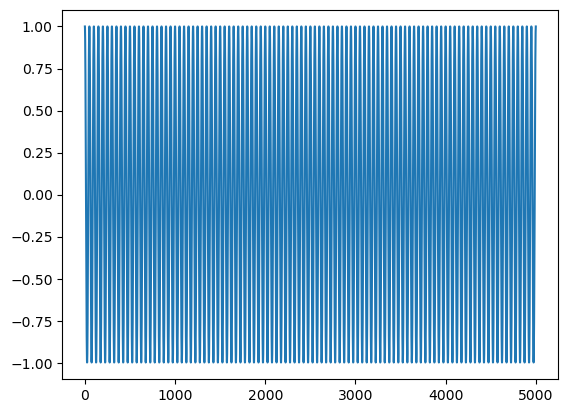

In [29]:
# Now we will get it right, we need to sort Y the same way as we sorted X using argsort()
Y_sorted = Y[X.argsort()]

plt.plot(X_sorted, Y_sorted)

Here we look at what happens when we have too much data - in this case selective visualisation is important

First, as above load the file cos.txt

In [31]:
# load cos.txt into time and temp respectively - using numpy loadtxt
time, temp = np.loadtxt('data/cos.txt', unpack=True)

print(time)
print(temp)

[0.000e+00 1.000e+00 2.000e+00 ... 4.997e+03 4.998e+03 4.999e+03]
[0.99995    0.99048977 0.96481739 ... 0.96739831 0.99181609 1.        ]


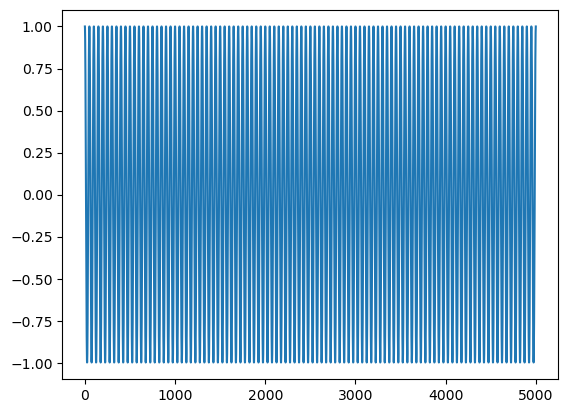

In [32]:
# plot time vs temp
plt.plot(time, temp)

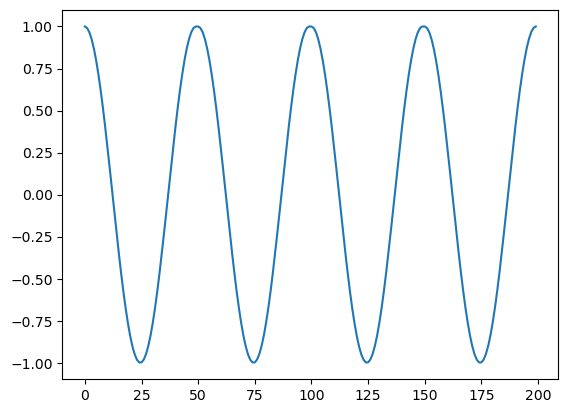

In [33]:
# plot the first 200 time steps
plt.plot(time[:200], temp[:200])

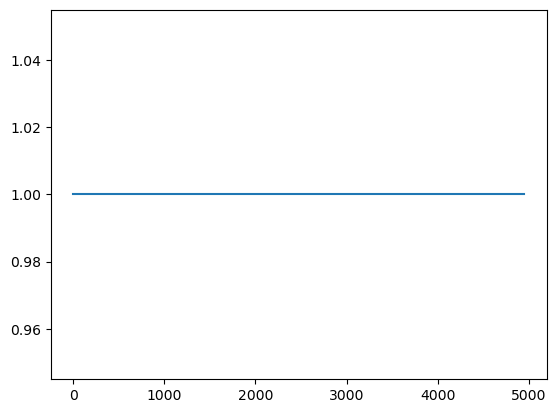

In [34]:
# plot every 50th sample - this can be done using two colons ::k -> every k-th sample
plt.plot(time[::50], temp[::50])

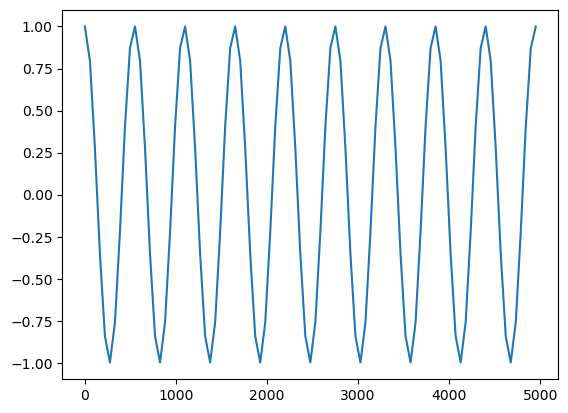

In [35]:
# plot every 55th sample 
plt.plot(time[::55], temp[::55])

 ## Multiple Plots

Here we will see two ways of plotting multiple pieces of information simultaneously
We will work with the file Gas_measurements.csv

In [45]:
# First load the file Gas_Measurements.csv 
gas_measurements = np.loadtxt('data/Gas_Measurements.csv', delimiter=' ')

print(gas_measurements)

[[  0.        -0.99975   12.8621    10.3683    10.4383    11.6699  ]
 [  1.        -0.999472  12.8617    10.3682    10.4375    11.6697  ]
 [  2.        -0.999194  12.8607    10.3686    10.437     11.6696  ]
 ...
 [496.        -0.82307   13.0587    10.6328    10.6901    11.9608  ]
 [497.        -0.822792  13.0592    10.6329    10.6899    11.9608  ]
 [498.        -0.822514  13.0587    10.6333    10.6897    11.9609  ]]


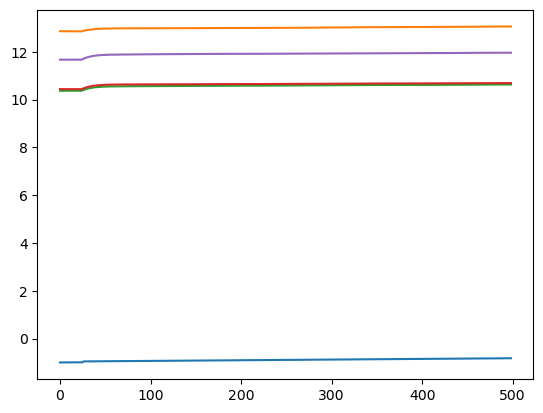

In [46]:
# plot the first column vs the remaining ones
plt.plot(gas_measurements[:,0], gas_measurements[:,1:])

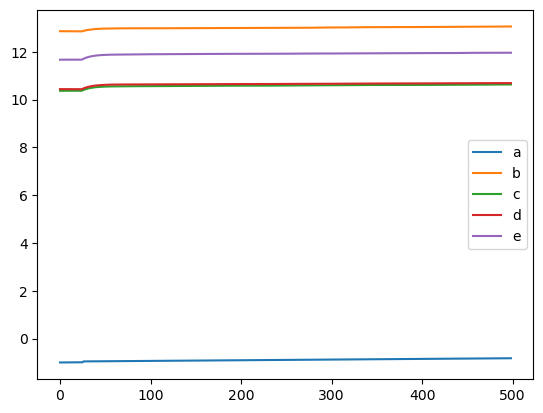

In [49]:
# Try to add a legend
# plot the first column vs the remaining ones
plt.plot(gas_measurements[:,0], gas_measurements[:,1:], label=['a','b','c','d','e'])
plt.legend()

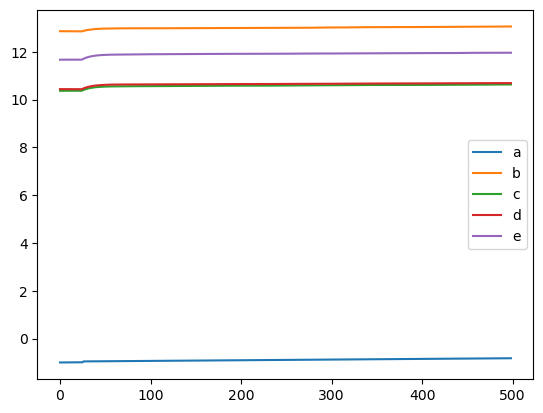

In [51]:
# create a for loop plotting the first column in X 
# versus the other columns in X 1 by 1 
# Hint: there are 5 other columns)
# -------------------------------------------
# Create a variable to hold the labels
# Make sure to add the correct label in each step

labels = ['a','b','c','d','e']

for i in range(1,6):
    plt.plot(gas_measurements[:,0], gas_measurements[:,i], label=labels[i-1])

plt.legend()


Here we will create subplots using the subplots function

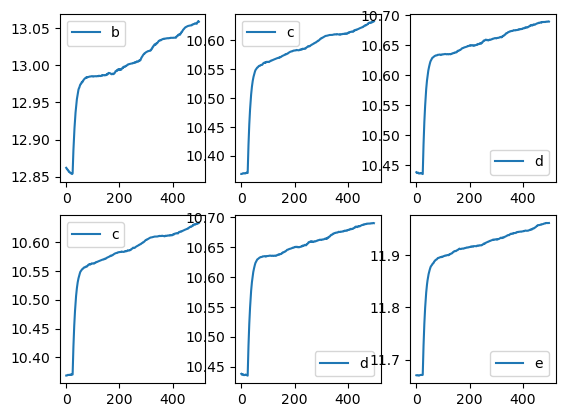

In [62]:
# First we create the subplots - all you need to do here is supply row and columns
# Notice it returns the figure and an array of axes  (check the types)

# create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=3)

# Now we can plot the data in each subplot
labels = ['a','b','c','d','e']

for i in range(1, 3):
    for j in range(1, 4):
        axs[i-1, j-1].plot(gas_measurements[:,0], gas_measurements[:,i+j], label=labels[i+j-1])
        axs[i-1, j-1].legend()

plt.show()


## Custom Plotting

This is extra - if the above was straightforward, try this. We want to have a plot in which the  region underneath a line plot is filled in with a specified color. Your task is to complete the following function so as to achieve this. 

In [66]:
# first we import some additional libraries
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# the function takes in a Nx2 matrix where we will plot the first column versus
# the second column. The line will be color1 and underneath we have the fill color line2. 
# We also pass the axis to the function, which we then return (this is good practice if
# we later want to add to the axis)
def plotunder(X,color1,color2,ax):
    # plot the line 
    ax.plot(X[:,0],X[:,1],color=color1)
    # your task is to create a variable polygon which contains the points which
    # determine the shape - you can assume that the y-axis is always above 0 
    # and begins with 0.
    
    polygon = [[0,0], [0,1], [1,1], [1,0]]
    
    p = PatchCollection([Polygon(polygon, closed=True,fill=True,color=color2)],match_original=True)
    ax.add_collection(p)
    return ax

<Axes: >

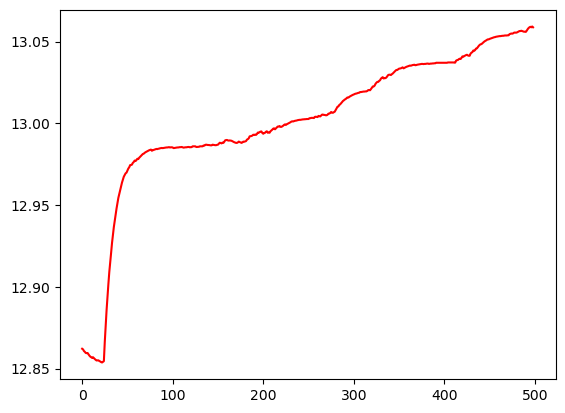

In [67]:
# testing the above function
fig,ax = plt.subplots(1,1)

X = np.loadtxt('data/Gas_Measurements.csv')
Y = X[:,(0,2)]
plotunder(Y,'red','blue',ax)